In [90]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline

In [91]:
Data = np.genfromtxt('data.txt', delimiter=',', skip_header=1)
print(Data)

[[4.220e+02 4.225e+02 4.230e+02 4.235e+02 4.240e+02 4.245e+02 4.250e+02
  4.255e+02 4.260e+02 4.265e+02]
 [1.800e+00 3.700e+00 5.700e+00 5.800e+00 5.900e+00 5.700e+00 4.800e+00
  3.000e+00 6.000e-01 0.000e+00]
 [1.700e+00 3.400e+00 4.400e+00 4.500e+00 4.900e+00 4.700e+00 3.800e+00
  1.900e+00 5.000e-01 0.000e+00]
 [1.000e-03 1.000e-01 5.000e-01 1.000e+00 6.000e-01 2.000e-01 1.000e-01
  7.000e-01 1.000e-03 1.000e-03]
 [1.000e-03 1.000e-01 4.000e-01 1.000e-01 2.000e-01 3.000e-01 1.000e-01
  1.000e-01 1.000e-03 1.000e-03]]


In [108]:
supply_current = Data[0]
print('Supply Current (A) = ', supply_current)

foil1 = Data[1]
print('Foil (uA) = ', foil1)

target2 = Data[2]
print('Target 2 current (uA) =', target2)

err = []

for i in range(len(Data[1])):
    err.append(0.05)

print('Error =',err)

Supply Current (A) =  [422.  422.5 423.  423.5 424.  424.5 425.  425.5 426.  426.5]
Foil (uA) =  [1.8 3.7 5.7 5.8 5.9 5.7 4.8 3.  0.6 0. ]
Target 2 current (uA) = [1.7 3.4 4.4 4.5 4.9 4.7 3.8 1.9 0.5 0. ]
Error = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


<function matplotlib.pyplot.show(*args, **kw)>

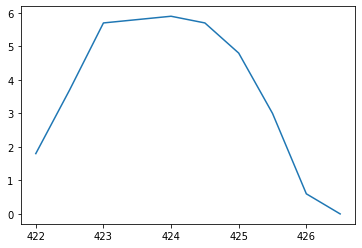

In [112]:
plt.plot(supply_current, foil1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

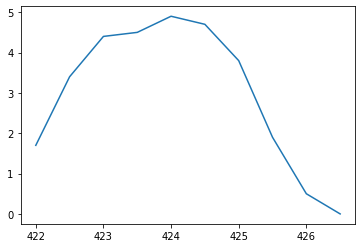

In [113]:
plt.plot(supply_current, target2)
plt.show

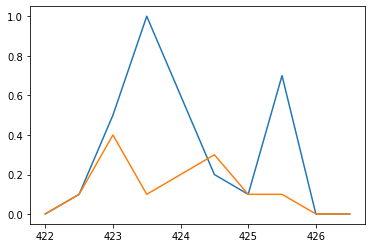

In [95]:
plt.plot(supply_current,coll12)
plt.plot(supply_current,coll23)
plt.show()

In [97]:
# Must find ratio between magnetic field B and current for each current spot (target 2, foil1)
# target 2 current peaks at 424 A with a current of 5.9 uA; foil peaks at 424 A with current of 4.9 uA

cyc_freq = 27.2e6
mp = 1.67e-27
e = 1.6e-19 

B = cyc_freq*2*3.1415*mp/e

def field_to_current_ratio(f,m,e,I):
    return 2*f*math.pi*m/(e*I)

print('B field is', B)
print(field_to_current_ratio(cyc_freq, mp, e, 424))

# Lucky for us, the same peak is experienced at the foil, and therefore, we have the same B/I ratio

B field is 1.7837437000000003
0.004207066765821427


In [ ]:
# Let us presume that the only considerable error is related to the uncertainty in the peak current. 

# We might say that the peak experienced at 424 A has an uncertainty of +/- 0.5 A.

# Foil should probably have a higher current because the beam hits here first, so one would imagine that some protons along
# the way get lost